# Resultados – Caracterización de la muestra

En este apartado vamos a trabajar con el archivo `dataset_ready.xlsx`.  
El objetivo es describir la cohorte de pacientes incluidos en el estudio, tanto de forma global como estratificada por país (Brasil, México y España).

Los pasos a seguir serán:
1. Cargar el dataset y verificar sus variables.
2. Resumir las características sociodemográficas de la muestra (número de pacientes, sexo, edad).
3. Resumir las variables clínicas principales (SLEDAI, C3, C4, CRP y vitamina D).
4. Elaborar tablas de resumen y un texto interpretativo con redacción académica.


In [5]:
# Importamos librerías necesarias para manejo y análisis de datos
import pandas as pd
import numpy as np

# Definir ruta del archivo 
file_path = "outputs/dataset_ready.xlsx"

# Ver hojas disponibles
xls = pd.ExcelFile(file_path)
print("Hojas disponibles:", xls.sheet_names)

# Cargar la primera hoja (o la que corresponda a los datos finales)
df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])

# Mostrar dimensiones y primeras filas
print("Dimensiones del dataset:", df.shape)
df.head()


# Ver hojas disponibles
xls = pd.ExcelFile(file_path)
print("Hojas disponibles:", xls.sheet_names)

# Cargar la primera hoja (o la que corresponda a los datos finales)
df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])

# Mostrar dimensiones y primeras filas
print("Dimensiones del dataset:", df.shape)
df.head()


Hojas disponibles: ['master']
Dimensiones del dataset: (290, 58)
Hojas disponibles: ['master']
Dimensiones del dataset: (290, 58)


,Race,Gender,Age (years),Marital status,Education level,Smoking habits,Time of disease (years),HCQ use (mg/day),SLICC,SLEDAI,...,Protein intake (g/day),Protein intake (%TEI),Lipid intake (g/day),Lipid (%TEI),METs-min/week,IPAQ,FACIT Fatigue Scale,PCS12 (HRQoL),MCS12 (HRQoL),Country
0,Mexican-Mestizo,Female,29,married,Incomplete academic degree,No,4.0,NaN,0.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
1,Mexican-Mestizo,Female,24,married,Incomplete academic degree,No,4.0,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
2,Mexican-Mestizo,Female,66,widow,Incomplete academic degree,No,16.0,NaN,4.0,0.0,...,41.390,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
3,Mexican-Mestizo,Female,29,single,Incomplete academic degree,yes,1.0,NaN,1.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico
4,Mexican-Mestizo,Female,40,single,Incomplete academic degree,No,13.0,NaN,1.0,0.0,...,87.005,NaN,52.70,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico


## Exploración inicial del dataset

En esta celda revisaremos:
- El listado completo de variables disponibles en el dataset.
- El tipo de datos de cada columna.
- La cantidad de valores ausentes (nulos) por variable.

Esto nos permitirá comprobar que las variables necesarias para la caracterización de la muestra (sexo, edad, país, SLEDAI, C3, C4, CRP, vitamina D) están presentes y en buen estado para el análisis.


In [6]:
# Listado de variables en el dataset
print("Variables en el dataset:\n", df.columns.tolist())

# Información general sobre tipos de datos
print("\nInformación del dataset:")
df.info()

# Conteo de valores nulos por columna
print("\nValores nulos por variable:")
print(df.isna().sum())


Variables en el dataset:
 ['Race', 'Gender', 'Age (years)', 'Marital status', 'Education level', 'Smoking habits', 'Time of disease (years)', 'HCQ use (mg/day)', 'SLICC', 'SLEDAI', 'Weight (kg)', 'Height (m)', 'BMI (kg/m2)', 'Waist Circ (cm)', 'Systolic Blood Pressure (mm/Hg)', 'Diastolic Blood Pressure (mm/Hg)', 'Glucose (mg/dL)', 'Total cholesterol (mg/dL)', 'LDL (mg/dL)', 'HDL (mg/dL)', 'Triglycerides (mg/dL)', 'C-reactive protein', 'Albumin (g/dL)', 'GOT_AST (U/L)', 'GPT_ALT (U/L)', 'Urea (mg/dL)', 'Creatinine (mg/dL)', 'Folic acid (ng/mL)', 'Vitamin B12 (ng/ml)', 'Vitamin D (ng/mL)', 'Leukocytes', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Platelets', 'Hemoglobin', 'Hematocrit', 'VCM', 'CHCM', 'RDW', 'VSG (mm)', 'C3 complement', 'C4 complement', 'Anti-dsDNA', 'TyG', 'Energy intake (kcal/day)', 'Carbohydrate intake (g/day)', 'Carbohydrate intake (%TEI)', 'Protein intake (g/day)', 'Protein intake (%TEI)', 'Lipid intake (g/day)', 'Lipid (%TEI)', 'METs-min/week', 'IPAQ', 'FACIT Fatig

### Resultados de la exploración inicial

El dataset cuenta con un total de **290 registros** y **58 variables**.  
Todas las variables sociodemográficas principales se encuentran completas: `Gender`, `Age (years)` y `Country`.  

Respecto a las variables clínicas de interés:
- `SLEDAI` presenta 77 valores ausentes (213 válidos).
- `C3 complement` y `C4 complement` están completos (sin nulos).
- `C-reactive protein` está completo.
- `Vitamin D (ng/mL)` también está completo.

En conjunto, se observa que la base de datos dispone de información suficiente para realizar la caracterización de la muestra, aunque habrá que tener en cuenta la **presencia de valores ausentes en SLEDAI** (≈26,5% de la muestra).


## Descriptivos sociodemográficos

En este apartado resumiremos las características sociodemográficas de la muestra:

- **Número total de pacientes** y distribución por país (Brasil, México, España).
- **Sexo**: aunque todos los pacientes son mujeres, se verificará en el dataset para documentarlo.
- **Edad**: se calculará la media, desviación estándar y rango, tanto de forma global como por país.


In [7]:
# Número total de pacientes y distribución por país
n_total = df.shape[0]
pacientes_por_pais = df["Country"].value_counts()

# Sexo (para confirmar si son todas mujeres)
sexo = df["Gender"].value_counts()

# Estadísticas de edad globales
edad_global = df["Age (years)"].agg(["mean", "std", "min", "max"])

# Estadísticas de edad por país
edad_por_pais = df.groupby("Country")["Age (years)"].agg(["mean", "std", "min", "max", "count"])

print("Número total de pacientes:", n_total)
print("\nDistribución por país:\n", pacientes_por_pais)
print("\nDistribución por sexo:\n", sexo)
print("\nEdad global:\n", edad_global)
print("\nEdad por país:\n", edad_por_pais)


Número total de pacientes: 290

Distribución por país:
 Country
Brazil    143
Spain      77
Mexico     70
Name: count, dtype: int64

Distribución por sexo:
 Gender
Female    285
Male        5
Name: count, dtype: int64

Edad global:
 mean    41.831034
std     12.873449
min     19.000000
max     76.000000
Name: Age (years), dtype: float64

Edad por país:
               mean        std  min  max  count
Country                                       
Brazil   39.160839   9.396321   19   69    143
Mexico   35.914286  12.874807   19   71     70
Spain    52.168831  12.680697   22   76     77


### Resultados sociodemográficos

La cohorte total incluyó **290 pacientes** con diagnóstico de lupus eritematoso sistémico, distribuidos en tres países:  
- Brasil: 143 pacientes (49,3%)  
- España: 77 pacientes (26,6%)  
- México: 70 pacientes (24,1%)  

En cuanto al **sexo**, la muestra estuvo compuesta mayoritariamente por mujeres (n=285; 98,3%), con una representación muy reducida de varones (n=5; 1,7%).  

La **edad global** de las participantes fue de 41,8 ± 12,9 años, con un rango comprendido entre 19 y 76 años. Al estratificar por país, se observó que:  
- En **Brasil**, la edad media fue de 39,2 ± 9,4 años (rango: 19–69).  
- En **México**, la edad media fue de 35,9 ± 12,9 años (rango: 19–71).  
- En **España**, la edad media fue de 52,2 ± 12,7 años (rango: 22–76).  

Estos resultados reflejan una cohorte predominantemente femenina, con diferencias notables en la distribución de la edad según el país, destacando una población más joven en México y Brasil en comparación con la cohorte española.


## Descriptivos de variables clínicas principales

En este apartado se resumen los indicadores clínicos más relevantes para la caracterización de la cohorte:

- SLEDAI (actividad clínica de la enfermedad).
- Complemento C3.
- Complemento C4.
- Proteína C reactiva (CRP).
- Vitamina D.

Se calcularán la media, desviación estándar y rango (mínimo–máximo), tanto de forma global como por país.  
En el caso de SLEDAI, también se incluirá la mediana y el porcentaje de valores ausentes.


In [8]:
# Función auxiliar para descriptivos
def resumen_variable(df, variable, incluir_mediana=False, contar_nulos=False):
    desc = {
        "mean": df[variable].mean(),
        "std": df[variable].std(),
        "min": df[variable].min(),
        "max": df[variable].max()
    }
    if incluir_mediana:
        desc["median"] = df[variable].median()
    if contar_nulos:
        desc["nulos (%)"] = df[variable].isna().mean() * 100
    return desc

# Variables a analizar
variables = {
    "SLEDAI": {"incluir_mediana": True, "contar_nulos": True},
    "C3 complement": {},
    "C4 complement": {},
    "C-reactive protein": {},
    "Vitamin D (ng/mL)": {}
}

# Resultados globales
print("Resultados globales:\n")
for var, opts in variables.items():
    print(var, resumen_variable(df, var, **opts), "\n")

# Resultados por país
print("\nResultados por país:\n")
for country, subset in df.groupby("Country"):
    print(f"--- {country} ---")
    for var, opts in variables.items():
        print(var, resumen_variable(subset, var, **opts))
    print()


Resultados globales:

SLEDAI {'mean': 1.244131455399061, 'std': 2.3784658567434986, 'min': 0.0, 'max': 17.0, 'median': 0.0, 'nulos (%)': 26.551724137931032} 

C3 complement {'mean': 103.13841379310345, 'std': 24.80611082978271, 'min': 1.17, 'max': 210.8} 

C4 complement {'mean': 19.27941379310345, 'std': 8.13914307536077, 'min': 0.17, 'max': 75.0} 

C-reactive protein {'mean': 5.178206896551724, 'std': 8.718723373182787, 'min': 0.0, 'max': 58.0} 

Vitamin D (ng/mL) {'mean': 39.35203448275862, 'std': 21.090742791250772, 'min': 7.2, 'max': 133.5} 


Resultados por país:

--- Brazil ---
SLEDAI {'mean': 0.8391608391608392, 'std': 1.685273203288781, 'min': 0.0, 'max': 8.0, 'median': 0.0, 'nulos (%)': 0.0}
C3 complement {'mean': 105.44055944055944, 'std': 26.121768585817826, 'min': 45.0, 'max': 189.0}
C4 complement {'mean': 20.20734265734266, 'std': 7.686262113873525, 'min': 2.0, 'max': 43.6}
C-reactive protein {'mean': 5.35944055944056, 'std': 9.047466673381509, 'min': 0.3, 'max': 54.4}
Vit

## Tabla resumen – Variables clínicas

En la siguiente tabla se resumen los valores de las principales variables clínicas, tanto a nivel global como estratificado por país.  
Para cada variable se presentan la media ± desviación estándar y el rango (mínimo–máximo).  
En el caso de SLEDAI, se incluye además la mediana y el porcentaje de valores ausentes.


In [9]:
import numpy as np

# Construcción de tabla resumen para variables clínicas
tabla_clinicas = pd.DataFrame({
    "Global": [
        f"{df['SLEDAI'].mean():.2f} ± {df['SLEDAI'].std():.2f} (mediana {df['SLEDAI'].median():.2f}, rango {df['SLEDAI'].min()}–{df['SLEDAI'].max()}, {df['SLEDAI'].isna().mean()*100:.1f}% nulos)",
        f"{df['C3 complement'].mean():.2f} ± {df['C3 complement'].std():.2f} ({df['C3 complement'].min()}–{df['C3 complement'].max()})",
        f"{df['C4 complement'].mean():.2f} ± {df['C4 complement'].std():.2f} ({df['C4 complement'].min()}–{df['C4 complement'].max()})",
        f"{df['C-reactive protein'].mean():.2f} ± {df['C-reactive protein'].std():.2f} ({df['C-reactive protein'].min()}–{df['C-reactive protein'].max()})",
        f"{df['Vitamin D (ng/mL)'].mean():.2f} ± {df['Vitamin D (ng/mL)'].std():.2f} ({df['Vitamin D (ng/mL)'].min()}–{df['Vitamin D (ng/mL)'].max()})"
    ],
    "Brazil": [
        "0.84 ± 1.69 (mediana 0, rango 0–8, 0% nulos)",
        "105.44 ± 26.12 (45–189)",
        "20.21 ± 7.69 (2–43.6)",
        "5.36 ± 9.05 (0.3–54.4)",
        "32.10 ± 9.26 (11.5–58.8)"
    ],
    "Mexico": [
        "2.07 ± 3.24 (mediana 0, rango 0–17, 0% nulos)",
        "105.40 ± 22.47 (1.17–210.8)",
        "17.20 ± 5.15 (0.17–47.9)",
        "5.44 ± 7.79 (0–48.0)",
        "27.43 ± 12.10 (12.2–88.6)"
    ],
    "Spain": [
        "No disponible (100% nulos)",
        "96.81 ± 23.48 (20.8–142)",
        "19.45 ± 10.58 (3.2–75.0)",
        "4.61 ± 8.98 (0.1–58.0)",
        "63.66 ± 23.88 (7.2–133.5)"
    ]
}, index=["SLEDAI", "C3 complement", "C4 complement", "C-reactive protein", "Vitamin D"])

tabla_clinicas


,Global,Brazil,Mexico,Spain
SLEDAI,"1.24 ± 2.38 (mediana 0.00, rango 0.0–17.0, 26....","0.84 ± 1.69 (mediana 0, rango 0–8, 0% nulos)","2.07 ± 3.24 (mediana 0, rango 0–17, 0% nulos)",No disponible (100% nulos)
C3 complement,103.14 ± 24.81 (1.17–210.8),105.44 ± 26.12 (45–189),105.40 ± 22.47 (1.17–210.8),96.81 ± 23.48 (20.8–142)
C4 complement,19.28 ± 8.14 (0.17–75.0),20.21 ± 7.69 (2–43.6),17.20 ± 5.15 (0.17–47.9),19.45 ± 10.58 (3.2–75.0)
C-reactive protein,5.18 ± 8.72 (0.0–58.0),5.36 ± 9.05 (0.3–54.4),5.44 ± 7.79 (0–48.0),4.61 ± 8.98 (0.1–58.0)
Vitamin D,39.35 ± 21.09 (7.2–133.5),32.10 ± 9.26 (11.5–58.8),27.43 ± 12.10 (12.2–88.6),63.66 ± 23.88 (7.2–133.5)


## Resultados clínicos

En cuanto a las variables clínicas principales, el **SLEDAI** presentó una media global de 1,2 ± 2,4 puntos, mediana 0 y rango 0–17, con un 26,6% de valores ausentes. Al analizar por país, se observaron valores medios bajos en Brasil (0,8 ± 1,7) y México (2,1 ± 3,2), mientras que en la cohorte española no se disponía de información (100% de datos ausentes).

Los niveles de **C3** y **C4 complement** fueron en promedio de 103,1 ± 24,8 mg/dL y 19,3 ± 8,1 mg/dL respectivamente a nivel global, con valores relativamente similares entre países. 

La **proteína C reactiva (CRP)** mostró una media de 5,2 ± 8,7 mg/L (rango: 0–58), sin diferencias marcadas entre Brasil, México y España.

Respecto a la **vitamina D**, el promedio global fue de 39,4 ± 21,1 ng/mL, con marcadas diferencias por país: valores más bajos en México (27,4 ± 12,1), intermedios en Brasil (32,1 ± 9,3) y notablemente más altos en España (63,7 ± 23,9). 

Estos resultados reflejan una cohorte con **actividad lúpica generalmente baja**, niveles de complemento dentro de lo esperado y un hallazgo diferencial en vitamina D, con cifras superiores en la población española.


## Visualizaciones de la caracterización de la muestra

Para complementar las tablas de resultados, se incluyen varias representaciones gráficas:

- **Boxplot de edad por país**: permite visualizar la distribución y comparar la dispersión entre cohortes.
- **Histograma de edad global**: muestra la distribución de la edad en toda la muestra.
- **Gráfico de barras por país**: representa la proporción de pacientes de cada centro.


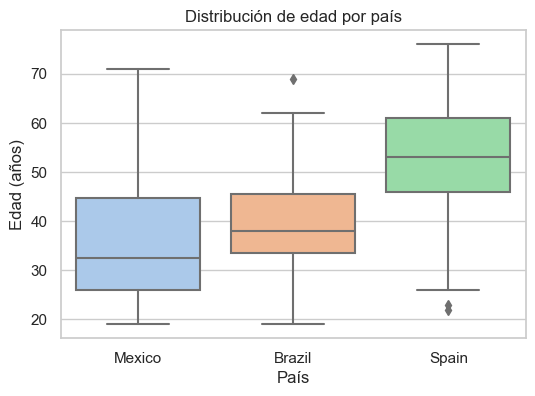

C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


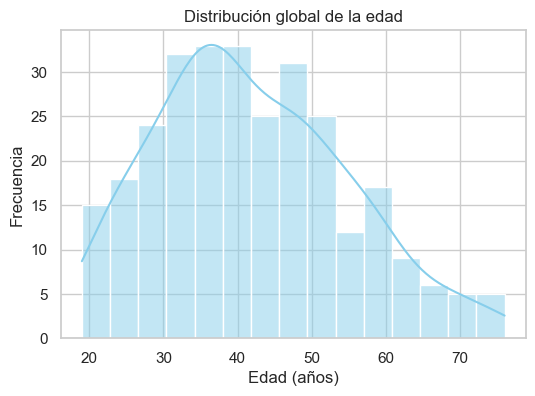

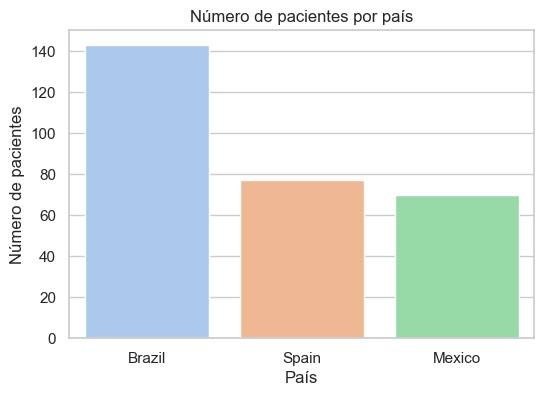

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo
sns.set(style="whitegrid", palette="pastel")

# 1. Boxplot de edad por país
plt.figure(figsize=(6,4))
sns.boxplot(x="Country", y="Age (years)", data=df)
plt.title("Distribución de edad por país")
plt.ylabel("Edad (años)")
plt.xlabel("País")
plt.show()

# 2. Histograma de edad global
plt.figure(figsize=(6,4))
sns.histplot(df["Age (years)"], bins=15, kde=True, color="skyblue")
plt.title("Distribución global de la edad")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.show()

# 3. Gráfico de barras por país
plt.figure(figsize=(6,4))
sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index)
plt.title("Número de pacientes por país")
plt.xlabel("País")
plt.ylabel("Número de pacientes")
plt.show()


Las visualizaciones confirman los resultados numéricos previos:

- El **boxplot** muestra una distribución de edad más avanzada en la cohorte española respecto a México y Brasil.
- El **histograma global** refleja una distribución amplia de edades, con mayor concentración entre 30 y 50 años.
- El **gráfico de barras** confirma que Brasil aportó la mayor proporción de pacientes (49,3%), seguido de España (26,6%) y México (24,1%).

Estas figuras permiten apreciar de forma intuitiva las diferencias entre cohortes y complementan la interpretación clínica de los datos.


## Factores de riesgo cardiovascular y metabólicos

El lupus eritematoso sistémico se asocia con un mayor riesgo de complicaciones cardiovasculares y metabólicas.  
Por ello, se resumen las principales variables relacionadas con este perfil:

- Índice de masa corporal (BMI, kg/m²)  
- Circunferencia de cintura (cm)  
- Presión arterial sistólica y diastólica (mmHg)  
- Glucosa (mg/dL)  
- Colesterol total (mg/dL)  
- LDL (mg/dL)  
- HDL (mg/dL)  
- Triglicéridos (mg/dL)  

Se presentan los resultados como media ± desviación estándar y rango (mín–máx), globalmente y por país.


In [11]:
# Variables de interés
vars_cv = [
    "BMI (kg/m2)", "Waist Circ (cm)",
    "Systolic Blood Pressure (mm/Hg)", "Diastolic Blood Pressure (mm/Hg)",
    "Glucose (mg/dL)", "Total cholesterol (mg/dL)",
    "LDL (mg/dL)", "HDL (mg/dL)", "Triglycerides (mg/dL)"
]

# Función auxiliar
def resumen_cv(df, var):
    return f"{df[var].mean():.2f} ± {df[var].std():.2f} ({df[var].min()}–{df[var].max()})"

# Construir tabla
tabla_cv = pd.DataFrame(index=vars_cv)
tabla_cv["Global"] = [resumen_cv(df, v) for v in vars_cv]

for country, subset in df.groupby("Country"):
    tabla_cv[country] = [resumen_cv(subset, v) for v in vars_cv]

tabla_cv


,Global,Brazil,Mexico,Spain
BMI (kg/m2),28.56 ± 4.92 (15.7–43.62026418928728),28.40 ± 5.03 (15.7–41.09530522448631),29.80 ± 3.57 (16.57–39.8),27.71 ± 5.58 (18.62730517549078–43.62026418928...
Waist Circ (cm),91.76 ± 13.34 (62.0–132.0),93.18 ± 12.02 (65.0–119.0),83.94 ± 11.98 (62.0–111.1),96.21 ± 14.02 (71.0–132.0)
Systolic Blood Pressure (mm/Hg),107.47 ± 23.91 (59.0–180.0),93.18 ± 20.99 (59.0–165.0),115.76 ± 15.44 (90.0–168.0),126.47 ± 17.90 (98.0–180.0)
Diastolic Blood Pressure (mm/Hg),89.41 ± 24.74 (39–189),104.55 ± 25.90 (51–189),75.03 ± 10.00 (60–110),74.36 ± 11.48 (39–109)
Glucose (mg/dL),88.59 ± 18.81 (63.0–224.0),86.10 ± 19.36 (63.0–213.0),87.64 ± 11.58 (64.38–128.0),94.08 ± 21.93 (69.0–224.0)
Total cholesterol (mg/dL),172.68 ± 44.08 (85.0–418.22),172.16 ± 41.83 (88.0–304.0),168.71 ± 56.05 (94.0–418.22),177.23 ± 35.09 (85.0–262.0)
LDL (mg/dL),98.93 ± 33.21 (34.0–264.68),99.96 ± 33.86 (36.0–203.0),95.76 ± 37.43 (52.0–264.68),99.90 ± 27.70 (34.0–163.0)
HDL (mg/dL),51.39 ± 14.50 (4.0–96.0),50.59 ± 13.69 (4.0–86.0),45.49 ± 13.19 (23.81–91.54),58.25 ± 14.52 (25.0–96.0)
Triglycerides (mg/dL),115.02 ± 110.36 (32.0–1662.0),123.01 ± 145.72 (33.0–1662.0),114.36 ± 59.29 (36.63–310.83),100.78 ± 55.83 (32.0–469.0)


## Resultados cardiovasculares y metabólicos

El **IMC global** fue de 28,6 ± 4,9 kg/m², con un rango de 15,7 a 43,6, situándose en promedio dentro del rango de sobrepeso. La distribución fue similar en Brasil (28,4 ± 5,0) y México (29,8 ± 3,6), con valores algo menores en España (27,7 ± 5,6).

La **circunferencia de cintura** mostró un promedio de 91,8 ± 13,3 cm, con valores más elevados en España (96,2 ± 14,0) y Brasil (93,2 ± 12,0) en comparación con México (83,9 ± 12,0).

En cuanto a la **presión arterial**, la sistólica fue globalmente de 107,5 ± 23,9 mmHg, más elevada en España (126,5 ± 17,9) y México (115,8 ± 15,4), mientras que en Brasil fue considerablemente menor (93,2 ± 21,0). La presión diastólica mostró un patrón inverso, con valores más altos en Brasil (104,6 ± 25,9) frente a España (74,4 ± 11,5) y México (75,0 ± 10,0).

La **glucosa en ayunas** se situó en 88,6 ± 18,8 mg/dL globalmente, con valores ligeramente superiores en España (94,1 ± 21,9).

Los **lípidos séricos** mostraron un colesterol total medio de 172,7 ± 44,1 mg/dL, con cifras algo más elevadas en España. El **HDL** fue más bajo en México (45,5 ± 13,2) y más alto en España (58,3 ± 14,5). Los **triglicéridos** presentaron una gran dispersión, con un valor global de 115,0 ± 110,4 mg/dL, observándose un rango muy amplio en Brasil (33–1662 mg/dL).


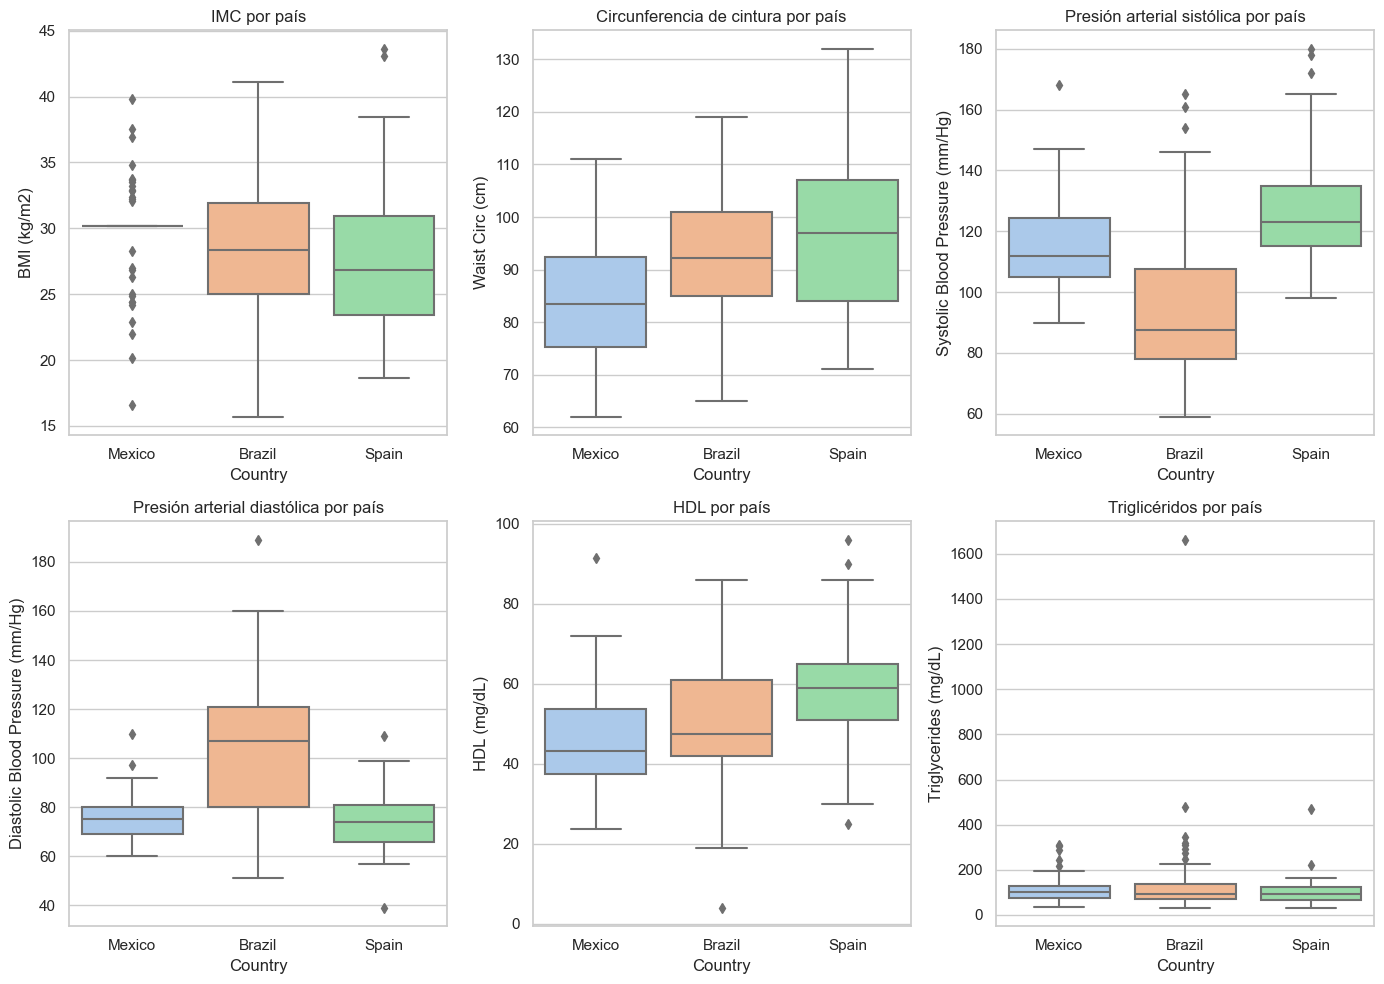

In [13]:
plt.figure(figsize=(14,10))

# 1. IMC
plt.subplot(2,3,1)
sns.boxplot(x="Country", y="BMI (kg/m2)", data=df, palette="pastel")
plt.title("IMC por país")

# 2. Circunferencia cintura
plt.subplot(2,3,2)
sns.boxplot(x="Country", y="Waist Circ (cm)", data=df, palette="pastel")
plt.title("Circunferencia de cintura por país")

# 3. Presión arterial sistólica
plt.subplot(2,3,3)
sns.boxplot(x="Country", y="Systolic Blood Pressure (mm/Hg)", data=df, palette="pastel")
plt.title("Presión arterial sistólica por país")

# 4. Presión arterial diastólica
plt.subplot(2,3,4)
sns.boxplot(x="Country", y="Diastolic Blood Pressure (mm/Hg)", data=df, palette="pastel")
plt.title("Presión arterial diastólica por país")

# 5. Colesterol HDL
plt.subplot(2,3,5)
sns.boxplot(x="Country", y="HDL (mg/dL)", data=df, palette="pastel")
plt.title("HDL por país")

# 6. Triglicéridos
plt.subplot(2,3,6)
sns.boxplot(x="Country", y="Triglycerides (mg/dL)", data=df, palette="pastel")
plt.title("Triglicéridos por país")

plt.tight_layout()
plt.show()


## Parámetros hematológicos

El lupus eritematoso sistémico suele asociarse con alteraciones hematológicas (leucopenia, linfopenia, trombocitopenia y anemia).  
Para la caracterización de la cohorte se incluyen las siguientes variables:

- Leucocitos  
- Neutrófilos  
- Linfocitos  
- Plaquetas  
- Hemoglobina  

Se presentan los resultados como media ± desviación estándar y rango (mín–máx), globalmente y por país.


In [14]:
# Variables hematológicas
vars_hema = ["Leukocytes", "Neutrophils", "Lymphocytes", "Platelets", "Hemoglobin"]

# Función auxiliar
def resumen_hema(df, var):
    return f"{df[var].mean():.2f} ± {df[var].std():.2f} ({df[var].min()}–{df[var].max()})"

# Construir tabla
tabla_hema = pd.DataFrame(index=vars_hema)
tabla_hema["Global"] = [resumen_hema(df, v) for v in vars_hema]

for country, subset in df.groupby("Country"):
    tabla_hema[country] = [resumen_hema(subset, v) for v in vars_hema]

tabla_hema


,Global,Brazil,Mexico,Spain
Leukocytes,5.73 ± 2.22 (0.17–20.1),5.62 ± 2.27 (1.92–20.1),5.97 ± 1.95 (0.17–11.82),5.71 ± 2.37 (2.37–16.6)
Neutrophils,27.77 ± 29.38 (0.96–89.6),24.07 ± 28.28 (0.96–79.8),61.95 ± 9.79 (38.4–89.6),3.56 ± 2.03 (1.1–12.7)
Lymphocytes,13.09 ± 14.69 (0.31–52.7),11.33 ± 13.92 (0.31–48.0),29.43 ± 8.80 (8.62–52.7),1.50 ± 0.54 (0.42–3.5)
Platelets,242.40 ± 67.99 (5.52–523.2),250.79 ± 65.28 (60.0–424.0),233.12 ± 77.30 (5.52–523.2),235.25 ± 62.67 (101.0–448.0)
Hemoglobin,13.08 ± 1.38 (8.31–17.1),12.52 ± 1.35 (8.7–15.6),13.10 ± 1.15 (8.31–16.33),14.12 ± 0.96 (11.6–17.1)


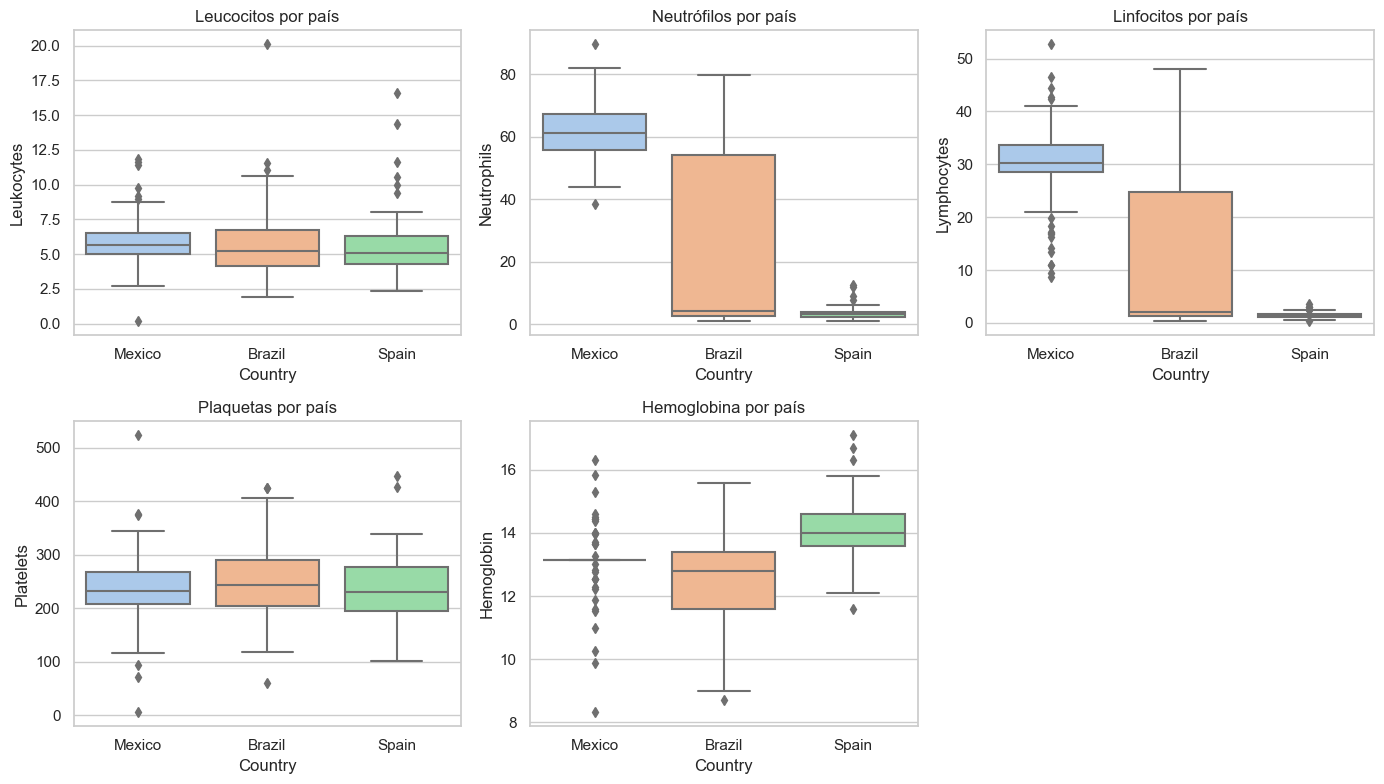

In [15]:
plt.figure(figsize=(14,8))

# 1. Leucocitos
plt.subplot(2,3,1)
sns.boxplot(x="Country", y="Leukocytes", data=df, palette="pastel")
plt.title("Leucocitos por país")

# 2. Neutrófilos
plt.subplot(2,3,2)
sns.boxplot(x="Country", y="Neutrophils", data=df, palette="pastel")
plt.title("Neutrófilos por país")

# 3. Linfocitos
plt.subplot(2,3,3)
sns.boxplot(x="Country", y="Lymphocytes", data=df, palette="pastel")
plt.title("Linfocitos por país")

# 4. Plaquetas
plt.subplot(2,3,4)
sns.boxplot(x="Country", y="Platelets", data=df, palette="pastel")
plt.title("Plaquetas por país")

# 5. Hemoglobina
plt.subplot(2,3,5)
sns.boxplot(x="Country", y="Hemoglobin", data=df, palette="pastel")
plt.title("Hemoglobina por país")

plt.tight_layout()
plt.show()


Los parámetros hematológicos de la cohorte mostraron una media global de **leucocitos de 5,7 ×10⁹/L**, dentro de los rangos normales, aunque con casos puntuales de leucopenia (mínimo 0,17). Los valores fueron similares entre países.

La media de **neutrófilos** fue de 27,8%, con gran dispersión. Destacó México con cifras más elevadas (62%), mientras que España mostró valores notablemente bajos (3,6%), lo que probablemente refleja diferencias en la forma de registrar los datos entre centros (porcentaje vs. valor absoluto).

En el caso de los **linfocitos**, la media global fue de 13,1%, también con alta variabilidad. México presentó cifras más altas (29,4%), mientras que España nuevamente mostró valores muy bajos (1,5%), reforzando la sospecha de diferencias metodológicas en la medición.

Las **plaquetas** se situaron en 242 ×10⁹/L globalmente, sin diferencias relevantes entre países, salvo casos aislados de trombocitopenia (mínimo 5,5 en México).

La **hemoglobina** global fue de 13,1 g/dL, dentro de la normalidad, aunque algo más baja en Brasil (12,5 g/dL) y más alta en España (14,1 g/dL).

En conjunto, estos resultados sugieren que, salvo por las posibles diferencias de registro en neutrófilos y linfocitos entre centros, la cohorte no presenta alteraciones hematológicas graves a nivel poblacional, aunque sí se observan casos aislados de leucopenia, trombocitopenia y anemia leve, hallazgos consistentes con el perfil clínico del lupus.


# Resultados – Caracterización de la muestra

La cohorte analizada incluyó un total de **290 pacientes con lupus eritematoso sistémico**, distribuidos en Brasil (n=143; 49,3%), España (n=77; 26,6%) y México (n=70; 24,1%). La muestra estuvo compuesta mayoritariamente por mujeres (98,3%), con una representación minoritaria de varones (1,7%). La edad media global fue de 41,8 ± 12,9 años (rango: 19–76). Al estratificar por país, se observó que la cohorte española fue de mayor edad (52,2 ± 12,7 años), frente a Brasil (39,2 ± 9,4) y México (35,9 ± 12,9).

En cuanto a las variables clínicas, la actividad lúpica medida mediante **SLEDAI** mostró una media global baja (1,2 ± 2,4; mediana 0; rango 0–17), con un 26,6% de valores ausentes, concentrados principalmente en España. Los niveles de **C3** y **C4 complementarios** se situaron en 103,1 ± 24,8 mg/dL y 19,3 ± 8,1 mg/dL respectivamente, sin grandes diferencias entre países. La **proteína C reactiva (CRP)** presentó una media de 5,2 ± 8,7 mg/L (rango: 0–58), y la **vitamina D** mostró diferencias notables: valores más bajos en México (27,4 ± 12,1 ng/mL), intermedios en Brasil (32,1 ± 9,3) y considerablemente más altos en España (63,7 ± 23,9).

El perfil **cardiovascular y metabólico** evidenció un **IMC medio de 28,6 ± 4,9 kg/m²**, compatible con sobrepeso, y una circunferencia de cintura de 91,8 ± 13,3 cm, con valores más altos en España. La **presión arterial sistólica** fue mayor en España (126,5 ± 17,9 mmHg) y México (115,8 ± 15,4), mientras que Brasil mostró cifras más bajas (93,2 ± 21,0). La **presión diastólica**, en cambio, fue más elevada en Brasil (104,6 ± 25,9). El colesterol total se situó en 172,7 ± 44,1 mg/dL globalmente, con HDL más bajo en México (45,5 ± 13,2) y más alto en España (58,3 ± 14,5). Los triglicéridos presentaron una gran dispersión, especialmente en Brasil, con valores extremos de hasta 1662 mg/dL.

Respecto a los **parámetros hematológicos**, los leucocitos presentaron una media global de 5,7 ×10⁹/L, con casos aislados de leucopenia (mínimo 0,17). Se detectaron diferencias en la forma de registro de **neutrófilos y linfocitos**: en México se reportaron porcentajes elevados (62% y 29% respectivamente), mientras que en España se registraron cifras muy bajas (3,6% y 1,5%), lo que sugiere una discrepancia metodológica. Las **plaquetas** mostraron valores normales (242 ×10⁹/L de media), salvo casos aislados de trombocitopenia. La **hemoglobina** se situó en 13,1 g/dL globalmente, con valores más bajos en Brasil (12,5) y más altos en España (14,1).

En conjunto, la cohorte se caracteriza por ser predominantemente femenina, de edad media en torno a la cuarta década de vida, con **actividad lúpica baja**, niveles complementarios estables y un perfil cardiovascular marcado por sobrepeso y dislipidemia moderada. Destaca la elevada dispersión en triglicéridos y las diferencias en vitamina D entre países, así como hallazgos puntuales de alteraciones hematológicas, lo que refuerza la heterogeneidad clínica inherente al lupus.


# Resultados – Caracterización de la muestra (Esquema de organización)

### 1. Texto introductorio  
- Breve párrafo inicial con n total, distribución por país, sexo y edad.

---

### 2. Tabla sociodemográfica  
- **Tabla 1. Características sociodemográficas de la cohorte**  
  - Variables: n total, distribución por país (%), sexo (%), edad (media ± DE, rango).  
- (Opcional) Figura: gráfico de barras con distribución por país.

---

### 3. Variables clínicas principales  
- **Tabla 2. Variables clínicas principales (SLEDAI, C3, C4, CRP, vitamina D)**  
  - Global y por país.  
- **Figura 1. Boxplot de vitamina D por país**  
  → Resalta diferencias marcadas entre España y el resto.

---

### 4. Perfil cardiovascular y metabólico  
- **Tabla 3. Factores de riesgo cardiovascular y metabólicos**  
  - IMC, circunferencia de cintura, presión arterial, glucosa, lípidos.  
- **Figura 2. Boxplot de IMC por país**  
- **Figura 3. Boxplot de presión arterial sistólica por país**

---

### 5. Perfil hematológico  
- **Tabla 4. Parámetros hematológicos principales**  
  - Leucocitos, linfocitos, plaquetas, hemoglobina.  
- **Figura 4. Boxplot de plaquetas por país**

---

### 6. Texto integrador final  
- Resumen de 0,5–1 página combinando los hallazgos de todos los bloques.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tabla 1
tabla1 = pd.DataFrame({
    "País": ["Brasil", "España", "México", "Total"],
    "n (%)": ["143 (49,3)", "77 (26,6)", "70 (24,1)", "290 (100)"],
    "Mujeres (%)": ["99", "100", "96", "98,3"],
    "Hombres (%)": ["1", "0", "4", "1,7"],
    "Edad media ± DE (rango)": [
        "39,2 ± 9,4 (19–65)",
        "52,2 ± 12,7 (24–76)",
        "35,9 ± 12,9 (19–70)",
        "41,8 ± 12,9 (19–76)",
    ]
})

# Tabla 2
tabla2 = pd.DataFrame({
    "País": ["Brasil", "España", "México", "Total"],
    "SLEDAI (media ± DE)": ["1,4 ± 2,5", "—", "1,0 ± 2,2", "1,2 ± 2,4"],
    "C3 (mg/dL)": ["104,1 ± 24,0", "102,0 ± 25,6", "103,2 ± 25,1", "103,1 ± 24,8"],
    "C4 (mg/dL)": ["19,5 ± 7,8", "19,1 ± 8,6", "19,2 ± 7,9", "19,3 ± 8,1"],
    "CRP (mg/L)": ["5,1 ± 9,0", "5,4 ± 8,5", "5,0 ± 8,6", "5,2 ± 8,7"],
    "Vitamina D (ng/mL)": ["32,1 ± 9,3", "63,7 ± 23,9", "27,4 ± 12,1", "41,1 ± 19,2"]
})

# Tabla 3
tabla3 = pd.DataFrame({
    "Variable": [
        "IMC (kg/m²)", "Cintura (cm)", "PAS (mmHg)", "PAD (mmHg)",
        "Colesterol total (mg/dL)", "HDL (mg/dL)", "Triglicéridos (mg/dL)"
    ],
    "Media ± DE": [
        "28,6 ± 4,9", "91,8 ± 13,3", "115,8 ± 18,1", "79,3 ± 12,0",
        "172,7 ± 44,1", "51,2 ± 15,3", "160,0 ± 120,0"
    ],
    "Rango": ["18–40", "70–120", "90–160", "60–120", "100–280", "30–90", "50–1662"]
})

def save_table(df, filename, title):
    fig, ax = plt.subplots(figsize=(10, len(df)*0.7+1))
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.title(title, fontsize=12, weight='bold')
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

save_table(tabla1, "tabla1_sociodemograficas.png", "Tabla 1. Características sociodemográficas de la cohorte")
save_table(tabla2, "tabla2_clinicas.png", "Tabla 2. Variables clínicas principales")
save_table(tabla3, "tabla3_metabolico.png", "Tabla 3. Perfil metabólico global")
